<a href="https://colab.research.google.com/github/mp914/Play-Store-Analysis/blob/Capstone-Project/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Play Store App Review Analysis

**Project Type** - Exploratory Data Analysis

**Contribution**- Individual

**Name** - Mustakim Pathan

**GitHub Link** -

# **Project Summary**



This is an Exploratory Data Analysis Project. In this project, I need to explore the data, clean it, and create visualizations. The first dataset is about the Google Play Store, containing 10,841 rows and 13 columns such as App, Category, Rating, Reviews, Size, Installs, etc. The second dataset is also related to the Google Play Store and includes hundreds of reviews for apps. It consists of 64,296 rows and 5 columns, with features allowing us to understand user sentiments, such as positive, negative, or neutral.

My task involves reading the data, understanding it, cleaning it by handling missing values and duplicates, and finally creating visualizations for the problem statements mentioned below. Additionally, I'll provide suggestions for developers and stakeholders that might assist them in making decisions for new app development."


## Exploring the Google Play Store: A Data Analysis Adventure 📱
# Hi Everybody..
In this notebook, I embark on a fascinating journey into the realm of Google Play Store data. Leveraging the power of Python, I delve into the details of mobile applications and reviews to extract valuable insights. This analysis is a testament to my maiden voyage into the world of data exploration.



# Datasets Overview:
**playstore data.csv:** This file encompasses exhaustive details about apps on Google Play, featuring 13 distinct attributes that characterize each application.

**user_reviews.csv:** Unveiling 100 reviews for every app, meticulously ordered from most helpful to least. The reviews have undergone pre-processing, and additional features such as Sentiment (Positive, Negative, or Neutral), Sentiment Polarity, and Sentiment Subjectivity have been appended.

# **Problem Statements**
1. Which app categories have the highest average ratings?
2. Top categories on Google Playstore?
3. Which Category have the highest proportion of paid apps?
4. App Category which have more numbers of Installs?
5. Top 10 most installed app in Game category?
6. What is the ratio of number of Paid apps and Free apps?
7. Percentage of Review Sentiments
8. Apps with the highest number of positive reviews
9. Apps with the highest number of negative reviews
10. Is sentiment_subjectivity proportional to sentiment_polarity?


# **Objectives**:

1) **Understand App Landscape**: Analyze the distribution of apps across different categories and genres on the Google Play Store.

2) **App Ratings Analysis**: Investigate the factors influencing app ratings and identify categories with the highest average ratings.

3) **Impact of Updates**: Evaluate the impact of app updates on user ratings and installations.

4)**Paid vs. Free Apps**: Determine which genres have the highest proportion of paid apps and understand user preferences.

5)**Installations Insights**: Explore the relationship between app installations and various factors like categories, sizes, and genres.


# **Importing Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline


# Data Loading, Data Exploration and Cleaning

*   Let's Load the data




In [ ]:
#mounting your drive, so that you can access the files there
#you'll receive a authentication prompt. Complete it.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sample_Data/Play Store Data.csv")

In [ ]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

-Important things to know

In [ ]:
#set options to Maximum rows and Columns
# it will give all columns and rows of output without hiding any rows or columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
print(f"The names of columns in the dataset are :\n {df.columns}")

The names of columns in the dataset are :
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [ ]:
print(f"The number of rows are {df.shape[0]}, and columns are {df.shape[1]}")

The number of rows are 10841, and columns are 13


# **Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:
1. **App** - It tells us about the name of the application with a short description (optional).
2. **Category** - It gives the category to the app.
3. **Rating** - It contains the average rating the respective app received from its users.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - IIt states whether an app is free to use or paid.
8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.
9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last Updated** - It tells us about the when the application was updated.
12. **Current Ver** - It tells us about the current version of the application.
13.**Android Ver** - It tells us about the android version which can support the application on its platform.

## Data Cleaning
# How to make size numeric columns

In [ ]:
# To view size and their value count
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.5M                    68
2.3M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
40M                     62
3.9M                    62
3

In [ ]:
#To see unique values in size column
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

## Obesrvations
1.   Varies with device
2.   M
3.   k
4.   1,000+





In [ ]:
df['Size'].isnull().sum()

0

- No missing values, we are good to go

Verify the number of values and 3 different kinds of values

In [ ]:
# Find the values M in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [ ]:
# Find the values k in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [ ]:
# Find the values Varies with device in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [ ]:
len(df)

10841

In [ ]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [ ]:
# Deal with 1,000+
df['Size'].replace('1,000+', np.nan, inplace=True)

In [ ]:
# Convert the whole size columns into bytes

#lets define the function

def convert_size(size):
  if isinstance(size, str):
    if 'k' in size:
      return float(size.replace('k',"")) * 1024
    elif 'M' in size:
      return float(size.replace('M',"")) * 1024 * 1024
    elif 'Varies with device' in size:
      return np.nan
  return size

In [ ]:
# lets apply this function

df['Size'] = df['Size'].apply(convert_size)

In [ ]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [ ]:
# rename the columns
df.rename(columns = {"Size":"Size_in_bytes"}, inplace = True)

In [ ]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size_in_bytes     Installs  Type Price Content Rating  \
0     159     19922944.0      10,000+  Free     0       Everyone   
1     967     14680064.0     500,000+  Free     0       Everyone   
2   87510      9122611.2   5,000,000+  Free     0       Everyone   
3  215644     26214400.0  50,000,000+  Free     0           Teen   
4     967      2936012.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [ ]:
df['Size_in_Mb'] =df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [ ]:
len(df.groupby('Installs')['Installs'].count())

22

In [ ]:
df.groupby('Installs')['Installs'].count()

Installs
0                    1
0+                  14
1+                  67
1,000+             907
1,000,000+        1579
1,000,000,000+      58
10+                386
10,000+           1054
10,000,000+       1252
100+               719
100,000+          1169
100,000,000+       409
5+                  82
5,000+             477
5,000,000+         752
50+                205
50,000+            479
50,000,000+        289
500+               330
500,000+           539
500,000,000+        72
Free                 1
Name: Installs, dtype: int64

In [ ]:
df['Installs'].unique

<bound method Series.unique of 0               10,000+
1              500,000+
2            5,000,000+
3           50,000,000+
4              100,000+
5               50,000+
6               50,000+
7            1,000,000+
8            1,000,000+
9               10,000+
10           1,000,000+
11           1,000,000+
12          10,000,000+
13             100,000+
14             100,000+
15               5,000+
16             500,000+
17              10,000+
18           5,000,000+
19          10,000,000+
20             100,000+
21             100,000+
22             500,000+
23             100,000+
24              50,000+
25              10,000+
26             500,000+
27             100,000+
28              10,000+
29             100,000+
30             100,000+
31              50,000+
32             100,000+
33             100,000+
34              10,000+
35             100,000+
36             500,000+
37           5,000,000+
38              10,000+
39             500,000+
40       

In [ ]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [ ]:
df['Installs'].isnull().sum()

0

## Install Columns
- We have seen that there is no null value in installs column and we groupby install count and we get 22 common installs count
- The only problem in install is to remove '+' sign and remove ',' in between value of install for ex: 1,000,000+  into 1000000




1.   Remove '+' sign
2.   Remove ','
3.   Convert the column into an integer



In [ ]:
# removing +
df['Installs'] = df["Installs"].apply(lambda x: x.replace("+","") if x in str(x) else x)

In [ ]:
# removing ,
df['Installs'] = df["Installs"].apply(lambda x: x.replace(",","") if x in str(x) else x)

In [ ]:
# typecasting installs into intregers
df['Installs'] = df['Installs'].apply(lambda x: int(x) if x != 'Free' else x)
# Here replace all Values which is free into 0
df['Installs'].replace('Free', '0', inplace=True)
df['Installs'] = df['Installs'].astype(int)

In [ ]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: Installs, dtype: int64

In [ ]:
df.describe()

Rating  Size_in_bytes      Installs   Size_in_Mb
count  9367.000000   9.145000e+03  1.084100e+04  9145.000000
mean      4.193338   2.256133e+07  1.546291e+07    21.516165
std       0.537431   2.368637e+07  8.502557e+07    22.589084
min       1.000000   8.704000e+03  0.000000e+00     0.008301
25%       4.000000   5.138022e+06  1.000000e+03     4.900000
50%       4.300000   1.363149e+07  1.000000e+05    13.000000
75%       4.500000   3.145728e+07  5.000000e+06    30.000000
max      19.000000   1.048576e+08  1.000000e+09   100.000000

In [ ]:
#Dealing With Price Columns
df['Price'].value_counts()

0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200.00   

In [ ]:
#lets see how many rows have string $ sign
df["Price"] .loc[df['Price'].str.contains('$')].value_counts().sum()

10841

In [ ]:
# removing $ sign
df['Price'] = df["Price"].apply(lambda x: x.replace("$",""))

In [ ]:
df["Price"].value_counts()

0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
29.99           7
24.99           7
3.49            7
7.99            7
5.49            6
19.99           6
11.99           5
6.49            5
12.99           5
8.99            5
10.00           3
16.99           3
1.00            3
2.00            3
13.99           2
8.49            2
17.99           2
1.70            2
3.95            2
79.99           2
7.49            2
9.00            2
10.99           2
39.99           2
33.99           2
19.40           1
3.90            1
1.96            1
4.60            1
15.46           1
3.04            1
4.29            1
2.60            1
3.28            1
4.80            1
4.59            1
3.08            1
28.99           1
2.95            1
2.90            1
1.97            1
200.00    

In [ ]:
# now this we convert into numeric value
# typecasting Price into float because many values in decimal
df['Price'] = df['Price'].apply(lambda x: float(x) if x != 'Everyone' else x)
# Here replace all Values which is Everyone into 0
df['Price'].replace('Everyone', '0', inplace=True)
df['Price'] = df['Price'].astype(float)

In [ ]:
df.describe()

Rating  Size_in_bytes      Installs         Price   Size_in_Mb
count  9367.000000   9.145000e+03  1.084100e+04  10841.000000  9145.000000
mean      4.193338   2.256133e+07  1.546291e+07      1.027273    21.516165
std       0.537431   2.368637e+07  8.502557e+07     15.948971    22.589084
min       1.000000   8.704000e+03  0.000000e+00      0.000000     0.008301
25%       4.000000   5.138022e+06  1.000000e+03      0.000000     4.900000
50%       4.300000   1.363149e+07  1.000000e+05      0.000000    13.000000
75%       4.500000   3.145728e+07  5.000000e+06      0.000000    30.000000
max      19.000000   1.048576e+08  1.000000e+09    400.000000   100.000000

In [ ]:
# prompt: using f string print min, max and average prices of the app

print(f"Minimum price of the app is {df['Price'].min()}")
print(f"Maximum price of the app is {df['Price'].max()}")
print(f"Average price of the app is {df['Price'].mean()}")


Minimum price of the app is 0.0
Maximum price of the app is 400.0
Average price of the app is 1.0272733142699015


# Converting **`Reviews`** column from string to int

In [ ]:
df['Reviews'].unique

<bound method Series.unique of 0             159
1             967
2           87510
3          215644
4             967
5             167
6             178
7           36815
8           13791
9             121
10          13880
11           8788
12          44829
13           4326
14           1518
15             55
16           3632
17             27
18         194216
19         224399
20            450
21            654
22           7699
23             61
24            118
25            192
26          20260
27            203
28            136
29            223
30           1120
31            227
32           5035
33           1015
34            353
35            564
36           8145
37          36639
38            158
39            591
40            117
41            176
42         295221
43           2206
44             26
45         174531
46           1070
47             85
48            845
49            367
50           1598
51            284
52          17057
53            1

In [ ]:
# Converting the datatype of the values in the reviews column from string to int
df['Reviews'] = df['Reviews'].apply(lambda x: float(x) if x != '3.0M' else x)
# Here replace all Values which is 3.0M into 0
df['Reviews'].replace('3.0M', '0', inplace=True)
df['Reviews'] = df['Reviews'].astype(int)

# Missing Values

In [ ]:
# prompt: find missing values

df.isnull().sum().sort_values(ascending = False)


Size_in_bytes     1696
Size_in_Mb        1696
Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [ ]:
# prompt: find missing value percentage in the data

df.isnull().sum() / df.shape[0] * 100


App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size_in_bytes     15.644313
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
Size_in_Mb        15.644313
dtype: float64

In [ ]:
# prompt: find total number of missing values

df.isnull().sum().sum()


4879

<Axes: >

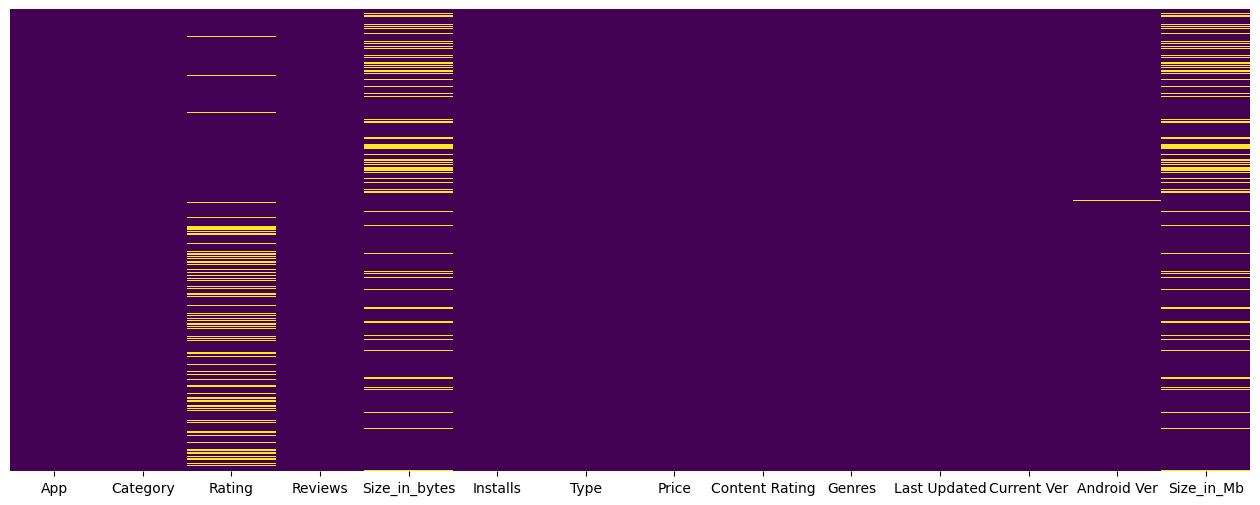

In [ ]:
#plot missing values

plt.figure(figsize = (16,6))
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis' )

Text(0.5, 1.0, 'Percentage of missing values in each column')

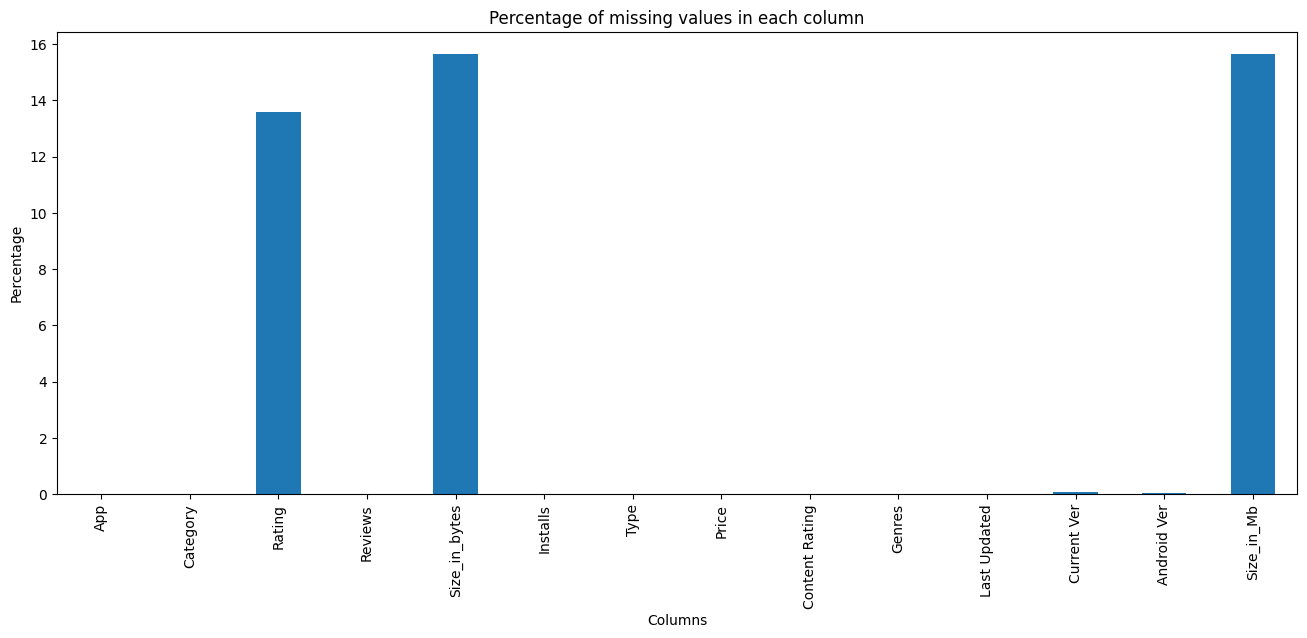

In [ ]:
#make bar chart of missing value percentage
#make figure size
plt.figure(figsize = (16,6))
#plot the null values by their percentage in each column
missing_percentage= df.isnull().sum()/len(df)*100
missing_percentage.plot(kind = 'bar')
#add the labels
plt.xlabel('Columns')
plt.ylabel("Percentage")
plt.title("Percentage of missing values in each column")


<Axes: >

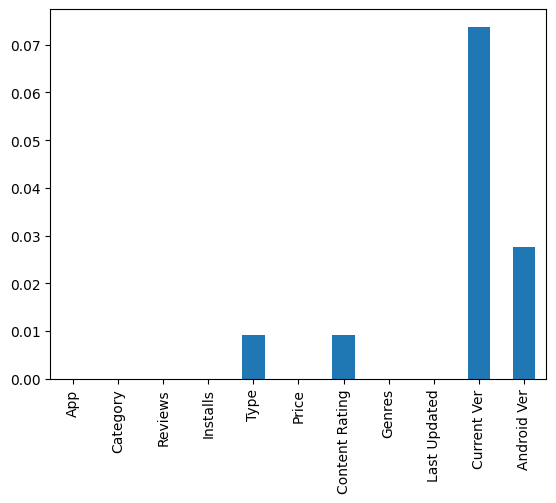

In [ ]:
missing_percentage[missing_percentage < 1].plot(kind = 'bar')

# Findings of Missing Values

From above Visulization we found that there are  **Rating, Size_in_bites,
 Size_in_mb** has more missing values and **Type,Current_ver,Android_ver** columns has less missing Values

so let's deal with all Missing values in columns

# Deal with **1.Rating, 2.Size_in_bites, 3.Size_in_mb** columns

In [ ]:
# The rows containing NaN values in the Rating column
len(df[df['Rating'].isnull()])

1474

* The `Rating` column contains 1474 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
* The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

**Visualization of distribution of rating using displot and detecting the outliers through boxplot.**

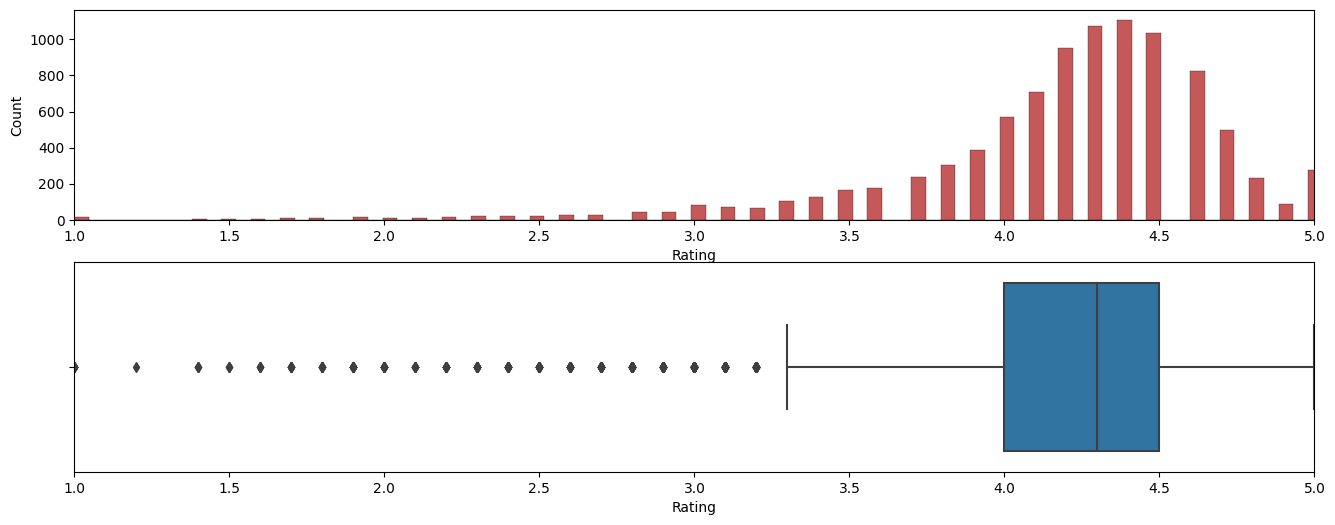

In [ ]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(16, 6))
# Histogram
sns.histplot(df['Rating'], color='firebrick', ax=ax[0])
ax[0].set_xlim(1, 5)  # Set x-axis limit
# Boxplot
sns.boxplot(x='Rating', data=df, ax=ax[1])
ax[1].set_xlim(1, 5)  # Set x-axis limit
# Show the plots
plt.show()

* The mean of the average ratings (excluding the NaN values) comes to be 4.2.

* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
* From the distplot visualizations, it is clear that the ratings are left skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the Rating column with its median.

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(df[~df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = df[~df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1933, 4.3]

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
df['Rating'].fillna(value=median_rating,inplace=True)

-After Dealing with Rating columns there are 2 columns which have more missing values **Size_in_bites,Size_in_mb**  but now i am not dealing with it beacause now i think that will not affect my visulization.if it will affecting then i will impute them with mean value of column.

#Dealing with **Type** column

type column havfe only one missing value

The `Type `column contains only two entries, namely, `Free` and `Paid`. Also, if the app is of type-paid`, the price of that app will be printed in the corresponding `Price` column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with Free.

In [ ]:
# Finding the different values the 'Type' column takes
df["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [ ]:
df.loc[9148,'Type']

nan

In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
df['Type'] = df['Type'].fillna('Free')
df['Type'] = df['Type'].replace('0', 'Free')

In [ ]:
df["Type"].value_counts()

Free    10041
Paid      800
Name: Type, dtype: int64

#Dealing with **Android Ver** column


In [ ]:
# The rows containing NaN values in the Android Ver column
df[df["Android Ver"].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

       Reviews  Size_in_bytes  Installs  Type  Price Content Rating  \
4453       230     11534336.0      1000  Paid   1.49       Everyone   
4490       189      2202009.6     10000  Free   0.00       Everyone   
10472        0            NaN         0  Free   0.00            NaN   

                  Genres    Last Updated Current Ver Android Ver  Size_in_Mb  
4453     Personalization   July 20, 2018         4.4         NaN        11.0  
4490     Personalization  March 27, 2018         1.1         NaN         2.1  
10472  February 11, 2018          1.0.19  4.0 and up         NaN         NaN

In [ ]:
# Finding the different values the 'Android Ver' column takes
df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
df=df[df['Android Ver'].notna()]
# Shape of the updated dataframe
df.shape

(10838, 14)

We were successfully able to handle the NaN values in the` Android Ver `column.

#Dealing with **Current Ver** column

In [ ]:
# The rows containing NaN values in the Current Ver column
df[df["Current Ver"].isnull()]

App             Category  Rating  Reviews  \
15     Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2       55   
1553              Market Update Helper   LIBRARIES_AND_DEMO     4.1    20145   
6322            Virtual DJ Sound Mixer                TOOLS     4.2     4010   
6803                         BT Master               FAMILY     4.3        0   
7333                       Dots puzzle               FAMILY     4.0      179   
7407                   Calculate My IQ               FAMILY     4.3       44   
7730                            UFO-CQ                TOOLS     4.3        1   
10342                   La Fe de Jesus  BOOKS_AND_REFERENCE     4.3        8   

       Size_in_bytes  Installs  Type  Price Content Rating             Genres  \
15         2831155.2      5000  Free   0.00       Everyone       Art & Design   
1553         11264.0   1000000  Free   0.00       Everyone   Libraries & Demo   
6322       9122611.2    500000  Free   0.00       Everyone              Tools   
6803        227328.0       100  Free   0.00       Everyone          Education   
7333      14680064.0     50000  Paid   0.99       Everyone             Puzzle   
7407       7549747.2     10000  Free   0.00       Everyone      Entertainment   
7730        242688.0        10  Paid   0.99       Everyone              Tools   
10342       673792.0      1000  Free   0.00       Everyone  Books & Reference   

            Last Updated Current Ver Android Ver  Size_in_Mb  
15          June 6, 2018         NaN  4.2 and up    2.700000  
1553   February 12, 2013         NaN  1.5 and up    0.010742  
6322        May 10, 2017         NaN  4.0 and up    8.700000  
6803    November 6, 2016         NaN  1.6 and up    0.216797  
7333      April 18, 2018         NaN  4.0 and up   14.000000  
7407       April 3, 2017         NaN  2.3 and up    7.200000  
7730        July 4, 2016         NaN  2.0 and up    0.231445  
10342   January 31, 2017         NaN  3.0 and up    0.642578

In [ ]:
# Finding the different values the 'Current Ver' column takes
df['Current Ver'].value_counts()

Varies with device                                    1459
1.0                                                    809
1.1                                                    263
1.2                                                    178
2.0                                                    151
1.3                                                    145
1.0.0                                                  136
1.0.1                                                  119
1.4                                                     88
1.5                                                     81
1.0.2                                                   80
1.6                                                     65
1.0.3                                                   62
2.1                                                     61
3.0                                                     59
1.0.4                                                   58
1.7                                                     

In [ ]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
df=df[df["Current Ver"].notna()]
# Shape of the updated dataframe
df.shape

(10830, 14)

# **Handling duplicates values and Manipulating dataset:**
### **`1).Handling the duplicates in the  `App `column`**

In [ ]:
# Handling the error values in the Play store data
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_bytes  Installs  Type  Price Content Rating  \
0      159     19922944.0     10000  Free    0.0       Everyone   
1      967     14680064.0    500000  Free    0.0       Everyone   
2    87510      9122611.2   5000000  Free    0.0       Everyone   
3   215644     26214400.0  50000000  Free    0.0           Teen   
4      967      2936012.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  Size_in_Mb  
0  4.0.3 and up        19.0  
1  4.0.3 and up        14.0  
2  4.0.3 and up         8.7  
3    4.2 and up        25.0  
4    4.4 and up         2.8

In [ ]:
df['App'].value_counts()

ROBLOX                                                                                                                                                                                                9
CBS Sports App - Scores, News, Stats & Watch Live                                                                                                                                                     8
Candy Crush Saga                                                                                                                                                                                      7
8 Ball Pool                                                                                                                                                                                           7
ESPN                                                                                                                                                                                                  7


In [ ]:
# Inspecting the duplicates values.
df[df['App']=='ROBLOX']

App Category  Rating  Reviews  Size_in_bytes   Installs  Type  Price  \
1653  ROBLOX     GAME     4.5  4447388     70254592.0  100000000  Free    0.0   
1701  ROBLOX     GAME     4.5  4447346     70254592.0  100000000  Free    0.0   
1748  ROBLOX     GAME     4.5  4448791     70254592.0  100000000  Free    0.0   
1841  ROBLOX     GAME     4.5  4449882     70254592.0  100000000  Free    0.0   
1870  ROBLOX     GAME     4.5  4449910     70254592.0  100000000  Free    0.0   
2016  ROBLOX   FAMILY     4.5  4449910     70254592.0  100000000  Free    0.0   
2088  ROBLOX   FAMILY     4.5  4450855     70254592.0  100000000  Free    0.0   
2206  ROBLOX   FAMILY     4.5  4450890     70254592.0  100000000  Free    0.0   
4527  ROBLOX   FAMILY     4.5  4443407     70254592.0  100000000  Free    0.0   

     Content Rating                        Genres   Last Updated  \
1653   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1701   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1748   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1841   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1870   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2016   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2088   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2206   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
4527   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   

       Current Ver Android Ver  Size_in_Mb  
1653  2.347.225742  4.1 and up        67.0  
1701  2.347.225742  4.1 and up        67.0  
1748  2.347.225742  4.1 and up        67.0  
1841  2.347.225742  4.1 and up        67.0  
1870  2.347.225742  4.1 and up        67.0  
2016  2.347.225742  4.1 and up        67.0  
2088  2.347.225742  4.1 and up        67.0  
2206  2.347.225742  4.1 and up        67.0  
4527  2.347.225742  4.1 and up        67.0

In [ ]:
df[df.duplicated()]

App             Category  \
229                         Quick PDF Scanner + OCR FREE             BUSINESS   
236                                                  Box             BUSINESS   
239                                   Google My Business             BUSINESS   
256                                  ZOOM Cloud Meetings             BUSINESS   
261                            join.me - Simple Meetings             BUSINESS   
265                                                  Box             BUSINESS   
266                                             Zenefits             BUSINESS   
267                                           Google Ads             BUSINESS   
268                                   Google My Business             BUSINESS   
269                                                Slack             BUSINESS   
270                                   FreshBooks Classic             BUSINESS   
271                                        Insightly CRM             BUSINESS   
272          QuickBooks Accounting: Invoicing & Expenses             BUSINESS   
273                       HipChat - Chat Built for Teams             BUSINESS   
274                             Xero Accounting Software             BUSINESS   
275              MailChimp - Email, Marketing Automation             BUSINESS   
276                 Crew - Free Messaging and Scheduling             BUSINESS   
277                        Asana: organize team projects             BUSINESS   
278                                     Google Analytics             BUSINESS   
279                                      AdWords Express             BUSINESS   
280                          Accounting App - Zoho Books             BUSINESS   
281                       Invoice & Time Tracking - Zoho             BUSINESS   
282                            join.me - Simple Meetings             BUSINESS   
283    Invoice 2go — Professional Invoices and Estimates             BUSINESS   
284     SignEasy | Sign and Fill PDF and other Documents             BUSINESS   
286                            Genius Scan - PDF Scanner             BUSINESS   
287                       Tiny Scanner - PDF Scanner App             BUSINESS   
288                         Fast Scanner : Free PDF Scan             BUSINESS   
289                     Mobile Doc Scanner (MDScan) Lite             BUSINESS   
290        TurboScan: scan documents and receipts in PDF             BUSINESS   
291                       Tiny Scanner Pro: PDF Doc Scan             BUSINESS   
292                        Docs To Go™ Free Office Suite             BUSINESS   
296          QuickBooks Accounting: Invoicing & Expenses             BUSINESS   
381                                   WhatsApp Messenger        COMMUNICATION   
394                                         Google Voice        COMMUNICATION   
396                                     Android Messages        COMMUNICATION   
414                                   Puffin Web Browser        COMMUNICATION   
430                                  Calls & Text by Mo+        COMMUNICATION   
431                                      Viber Messenger        COMMUNICATION   
465                        imo free video calls and chat        COMMUNICATION   
466                            free video calls and chat        COMMUNICATION   
468                        Skype - free IM & video calls        COMMUNICATION   
469                                               WeChat        COMMUNICATION   
472                         Glide - Video Chat Messenger        COMMUNICATION   
473                         Talkray - Free Calls & Texts        COMMUNICATION   
474                          LINE: Free Calls & Messages        COMMUNICATION   
475                         KakaoTalk: Free Calls & Text        COMMUNICATION   
542                                       OkCupid Dating               DATING   
543                                  CMB Free Dating App               DATING   
544

In [ ]:
# dropping duplicates from the 'App' column.
df.drop_duplicates(subset = 'App', inplace = True)
df.shape

(9649, 14)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
df[df['App']=='ROBLOX']

App Category  Rating  Reviews  Size_in_bytes   Installs  Type  Price  \
1653  ROBLOX     GAME     4.5  4447388     70254592.0  100000000  Free    0.0   

     Content Rating                        Genres   Last Updated  \
1653   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   

       Current Ver Android Ver  Size_in_Mb  
1653  2.347.225742  4.1 and up        67.0

-We have successfully handled all the duplicate values in the App column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.

### **`2). Changing the datatype of the Last Updated column from string to datetime.`**

In [ ]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_bytes  Installs  Type  Price Content Rating  \
0      159     19922944.0     10000  Free    0.0       Everyone   
1      967     14680064.0    500000  Free    0.0       Everyone   
2    87510      9122611.2   5000000  Free    0.0       Everyone   
3   215644     26214400.0  50000000  Free    0.0           Teen   
4      967      2936012.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

   Size_in_Mb  
0        19.0  
1        14.0  
2         8.7  
3        25.0  
4         2.8

In [ ]:
df["Last Updated"].value_counts()

2018-08-03    252
2018-08-02    230
2018-08-01    209
2018-07-31    204
2018-07-30    160
2018-07-26    135
2018-07-25    129
2018-07-24    121
2018-07-27    120
2018-08-06    115
2018-07-23    110
2018-07-18     98
2018-07-19     97
2018-07-16     91
2018-07-11     88
2018-08-04     85
2018-07-12     84
2018-07-17     81
2018-07-09     80
2018-07-03     79
2018-07-13     74
2018-07-05     72
2018-07-20     71
2018-05-24     59
2018-06-26     55
2018-06-25     53
2018-06-27     51
2018-07-06     50
2018-06-13     50
2018-07-04     49
2018-07-28     49
2018-05-25     48
2018-06-29     46
2018-08-05     45
2018-06-21     44
2018-07-02     44
2018-07-10     43
2018-06-28     43
2018-06-06     42
2018-06-19     41
2018-05-22     40
2018-05-23     40
2018-06-05     38
2018-06-12     37
2018-06-15     36
2018-07-29     36
2018-08-07     36
2018-06-20     35
2018-06-08     34
2018-06-14     34
2018-06-18     34
2018-06-11     34
2018-05-31     33
2018-05-29     32
2018-05-30     32
2018-04-26

# Exploring Data Relationships with Pair Plots

The pair plot is a powerful tool for uncovering patterns and relationships between quantitative variables. By visualizing the pairwise interactions between features, we can identify potential correlations, trends, or clusters in the dataset.

**Objective:**
To gain insights into the relationships between different quantitative variables and identify patterns that may inform further analysis or modeling.

**Approach:**
1. **Pairwise Visualization:** Create a pair plot to visualize the relationships between all quantitative variables in the dataset.
2. **Pattern Identification:** Look for evident patterns, clusters, or trends that may suggest correlations or dependencies between features.
3. **Modeling Implications:** Consider how the observed relationships might influence the choice of models or feature engineering in subsequent analysis.

By examining the pair plot, we aim to uncover valuable insights that contribute to a deeper understanding of the dataset's structure and guide further exploration.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

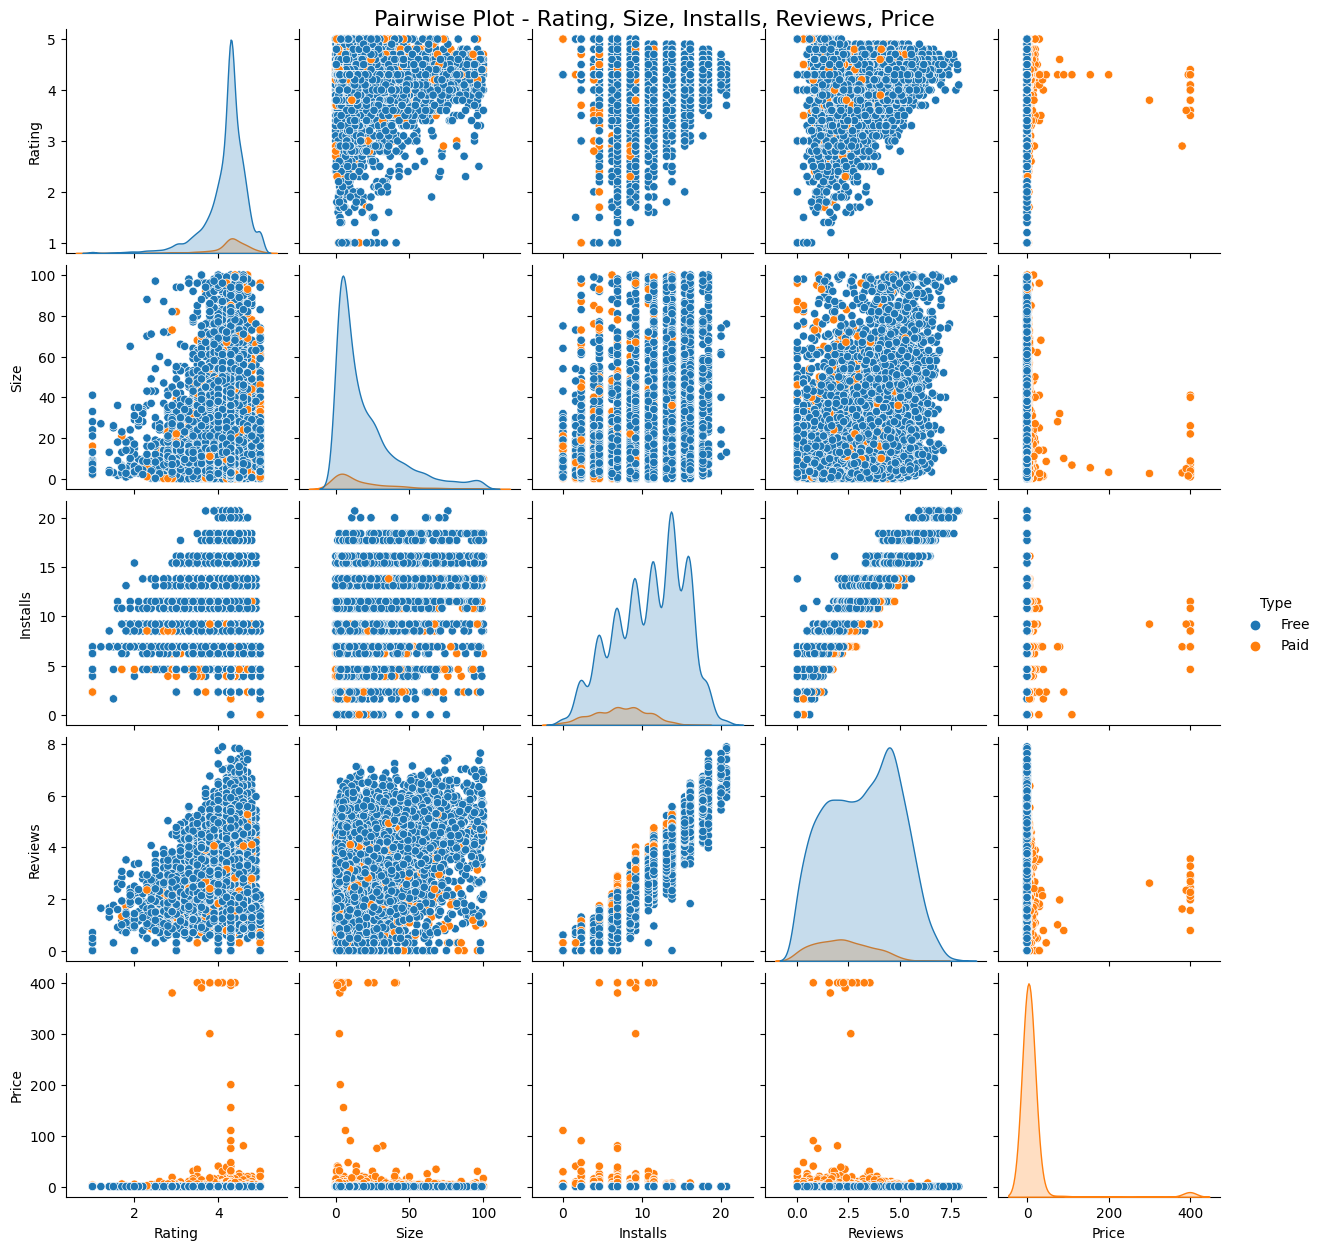

In [ ]:
ratings = df["Rating"]
size = df["Size_in_Mb"]
Installs = df['Installs']
Reviews = df['Reviews']
Type = df['Type']
Price = df['Price']
pairplot_ = sns.pairplot(pd.DataFrame(list(zip(ratings, size, np.log(Installs), np.log10(Reviews), Price, Type)), columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
# np.log and np.log10 is used to scale down data into small size
pairplot_.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

**FINDINGS**
* Most of the Apps are Free.
* Most of the Paid Apps have Rating around 4
* As the number of installation increases the number of reviews of the particaular app also increases.
*Most of the Apps are light-weighted.

## **☘ Let us see what insight we can have on the basis of Size of an app**

## **`Size vs Rating`**

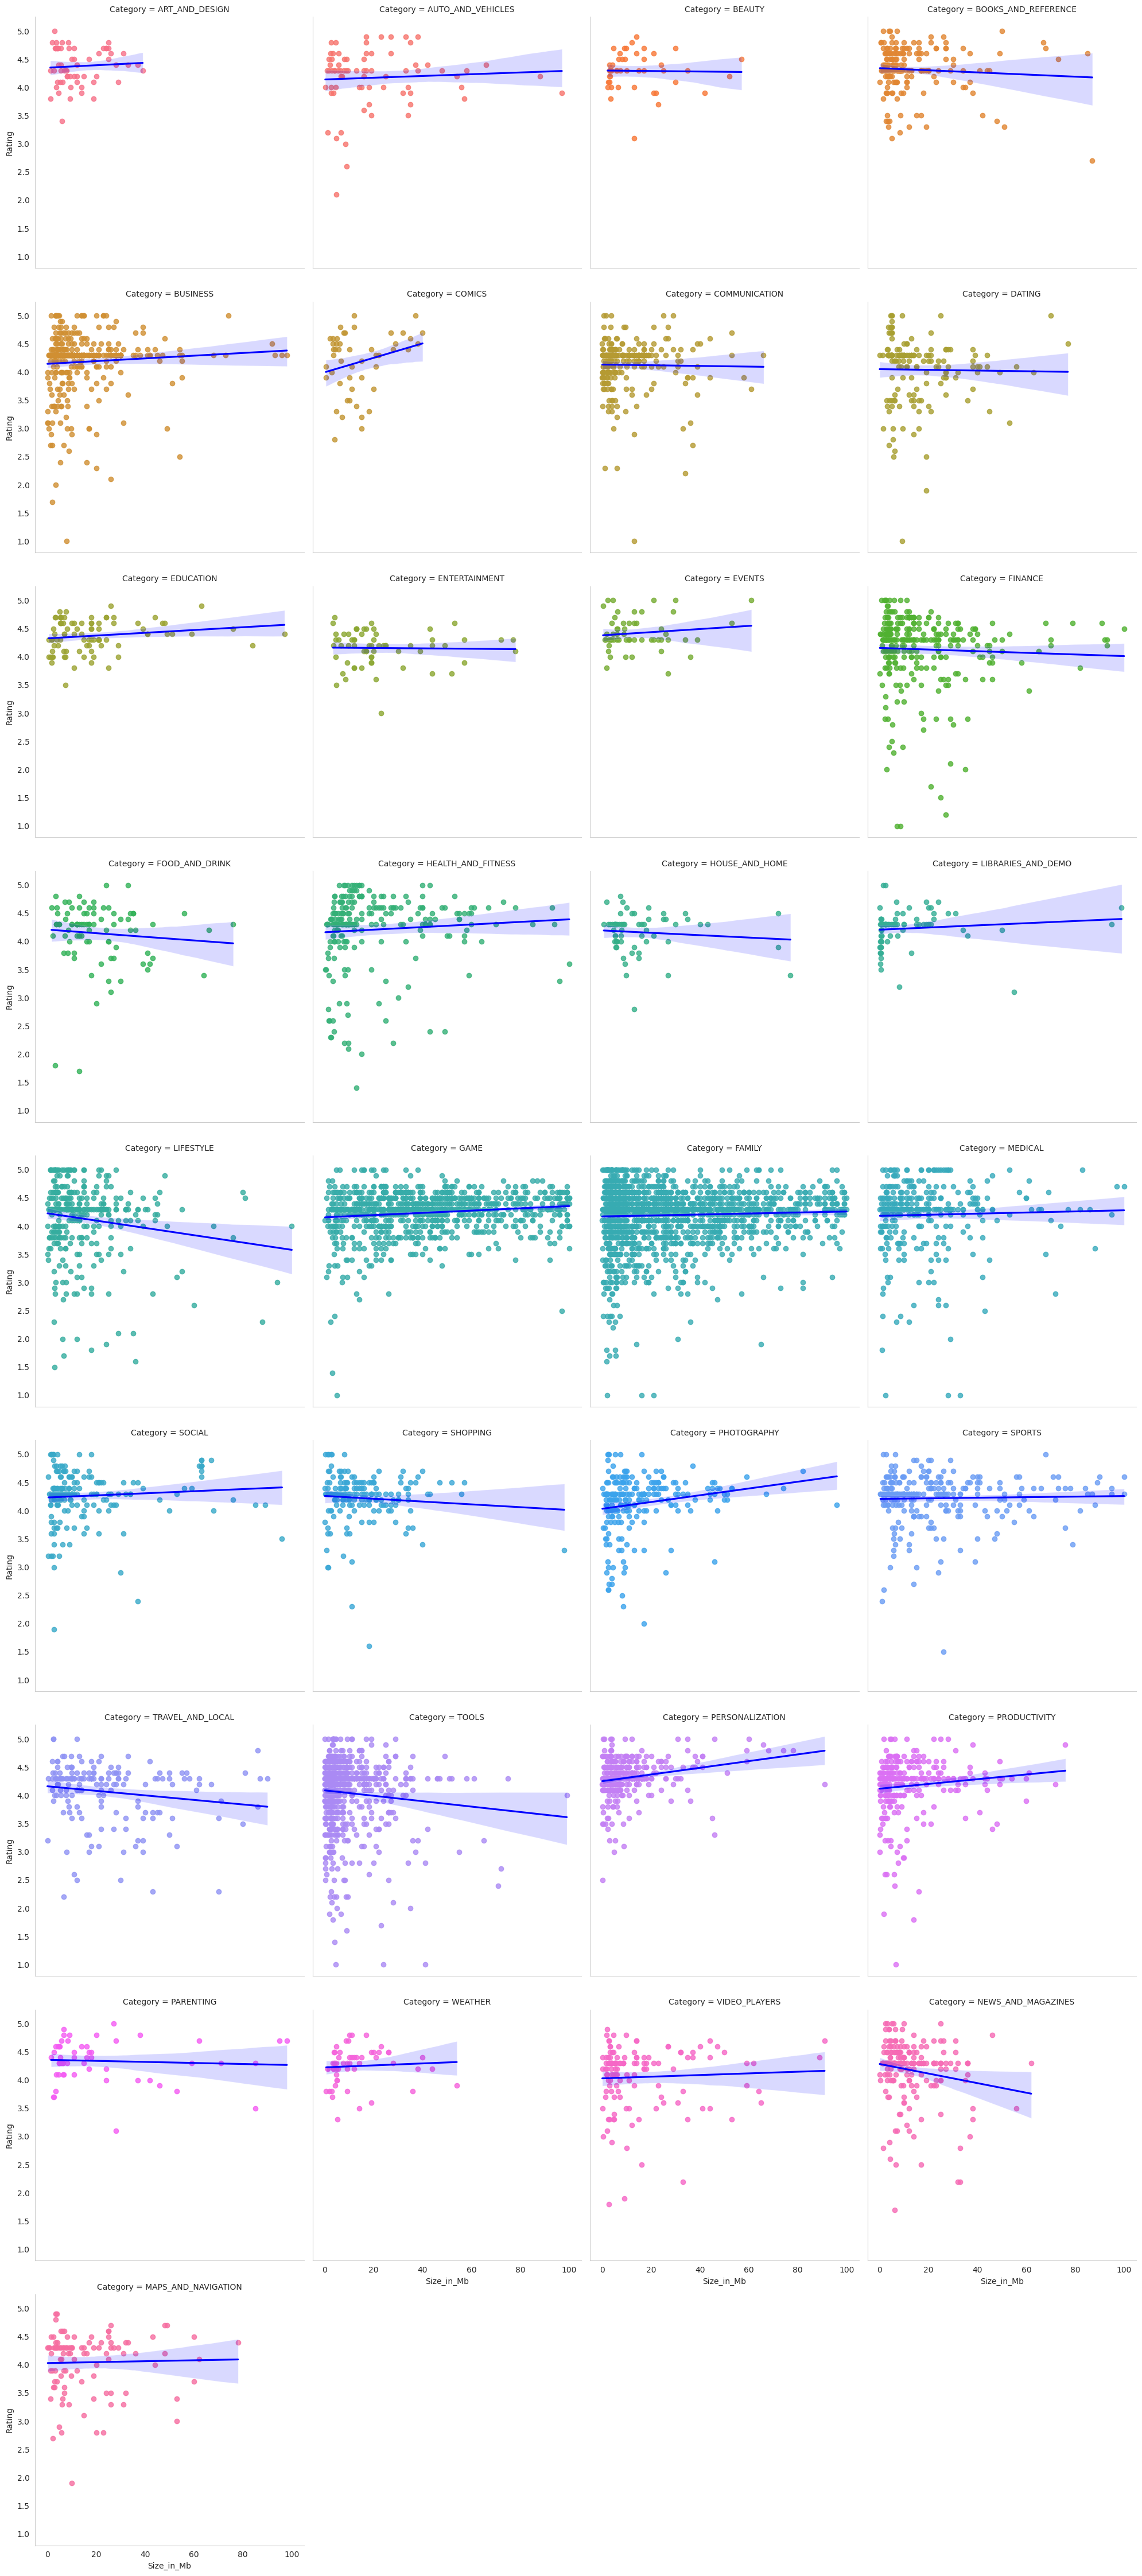

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size_in_Mb',data=df,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'blue'})

# **Exploring User_review dataframe**

In [ ]:
# Reading the userreviews.csv file
ur_df = pd.read_csv("/content/drive/MyDrive/Sample_Data/User Reviews.csv")

In [ ]:
# Checking the top 10 rows of the data
ur_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Checking shape and column in dataframe
rows=ur_df.shape[0]
columns=ur_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

the no of rows is 64295 and no of columns is 5


**Let us first define what information the columns contain based on our inspection.**

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

* **App:** Contains the name of the app with a short description (optional).
* **Translated_Review:** It contains the English translation of the review dropped by the user of the app.
* **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

In [ ]:
  temp1=pd.DataFrame(index=ur_df.columns)
  temp1["datatype"]=ur_df.dtypes
  temp1["not null values"]=ur_df.count()
  temp1["null value"]=ur_df.isnull().sum()
  temp1["% of the null value"]=ur_df.isnull().mean().round(4)*100
  temp1["unique count"]=ur_df.nunique()

In [ ]:
temp1

datatype  not null values  null value  \
App                      object            64295           0   
Translated_Review        object            37427       26868   
Sentiment                object            37432       26863   
Sentiment_Polarity      float64            37432       26863   
Sentiment_Subjectivity  float64            37432       26863   

                        % of the null value  unique count  
App                                    0.00          1074  
Translated_Review                     41.79         27994  
Sentiment                             41.78             3  
Sentiment_Polarity                    41.78          5410  
Sentiment_Subjectivity                41.78          4474

**Findings**

The number of null values are:
* **Translated_Review** has 26868 null values which contributes **41.79%** of the data.
* **Sentiment** has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Polarity**  has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Subjectivity** has 26863 null values which contributes **41.78%** of the data.

- From above exploration we found that all columns has same null value, and key columns is Translated_Review, if Translated_Review columns contain null row then all columns conataining null rows.

- So we are dropping null values in data

In [ ]:
# Deleting the rows containing NaN values
ur_df = ur_df.dropna()

In [ ]:
# The shape of the updated df
ur_df.shape

(37427, 5)

In [ ]:
# Inspecting the sentiment column
ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

The values in the `Sentiment_Polarity and Sentiment_Subjectivity`looks correct.

On the given datasets, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals. It is easy to compare different measures using the visualizations, and thus to draw implications from them.

# **Data Visualization on play store data:**
We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.

## **`1). Which app categories have the highest average ratings?`**

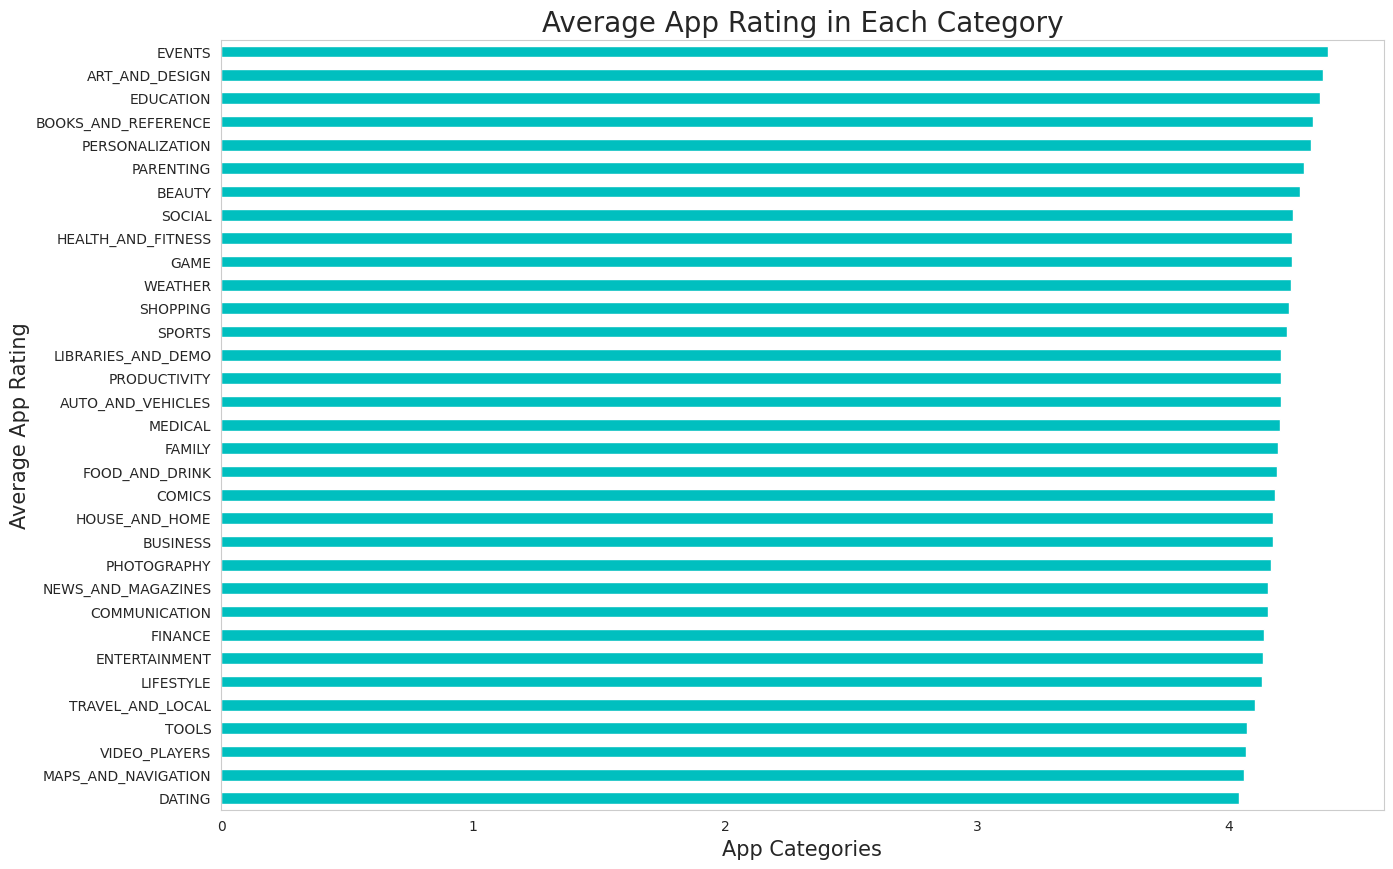

In [ ]:
# Calculate average rating for each category
average_ratings = df.groupby(['Category'])['Rating'].mean().sort_values()

# Plotting
average_ratings.plot.barh(figsize=(15, 10), color='c')
plt.ylabel('Average App Rating', fontsize=15)
plt.xlabel('App Categories', fontsize=15)
plt.title('Average App Rating in Each Category', fontsize=20)
plt.show()


- From above Visulization we know that almost all category having average rating between 4 to 5.
- So we take only top 10 category with highest average rating and zoom in 4 to 5  range

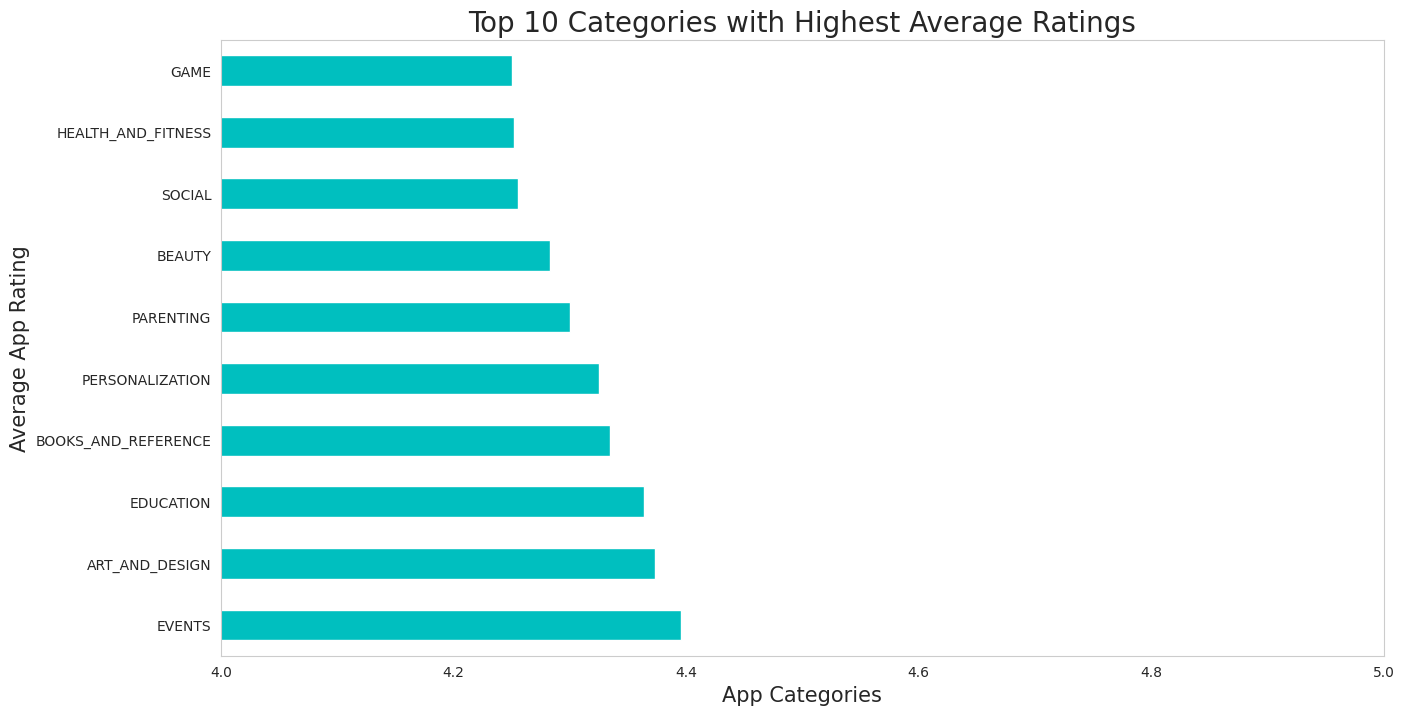

In [ ]:
# Specify the number of top categories to display
top_n_categories = 10

# Calculate average rating for each category
average_ratings = df.groupby(['Category'])['Rating'].mean().sort_values(ascending = False)

# Filter and select the top N categories
top_categories = average_ratings.head(top_n_categories)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
top_categories.plot.barh(ax=ax, color='c')
plt.ylabel('Average App Rating', fontsize=15)
plt.xlabel('App Categories', fontsize=15)
plt.title(f'Top {top_n_categories} Categories with Highest Average Ratings', fontsize=20)

# Set x-axis limits to zoom in on ratings between 4 and 5
ax.set_xlim(4, 5)

plt.show()

- Here we can easily understand Event **Category** has Highest Average Rating

# 2).Top categories on Google Playstore?

In [ ]:
df.groupby(['Category'])['App'].count().sort_values(ascending=False).head(10)

Category
FAMILY             1829
GAME                959
TOOLS               825
BUSINESS            420
MEDICAL             395
PERSONALIZATION     374
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: App, dtype: int64

In [ ]:
y =df['Category'].value_counts()
x = df['Category'].value_counts().index
y_list = []
x_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

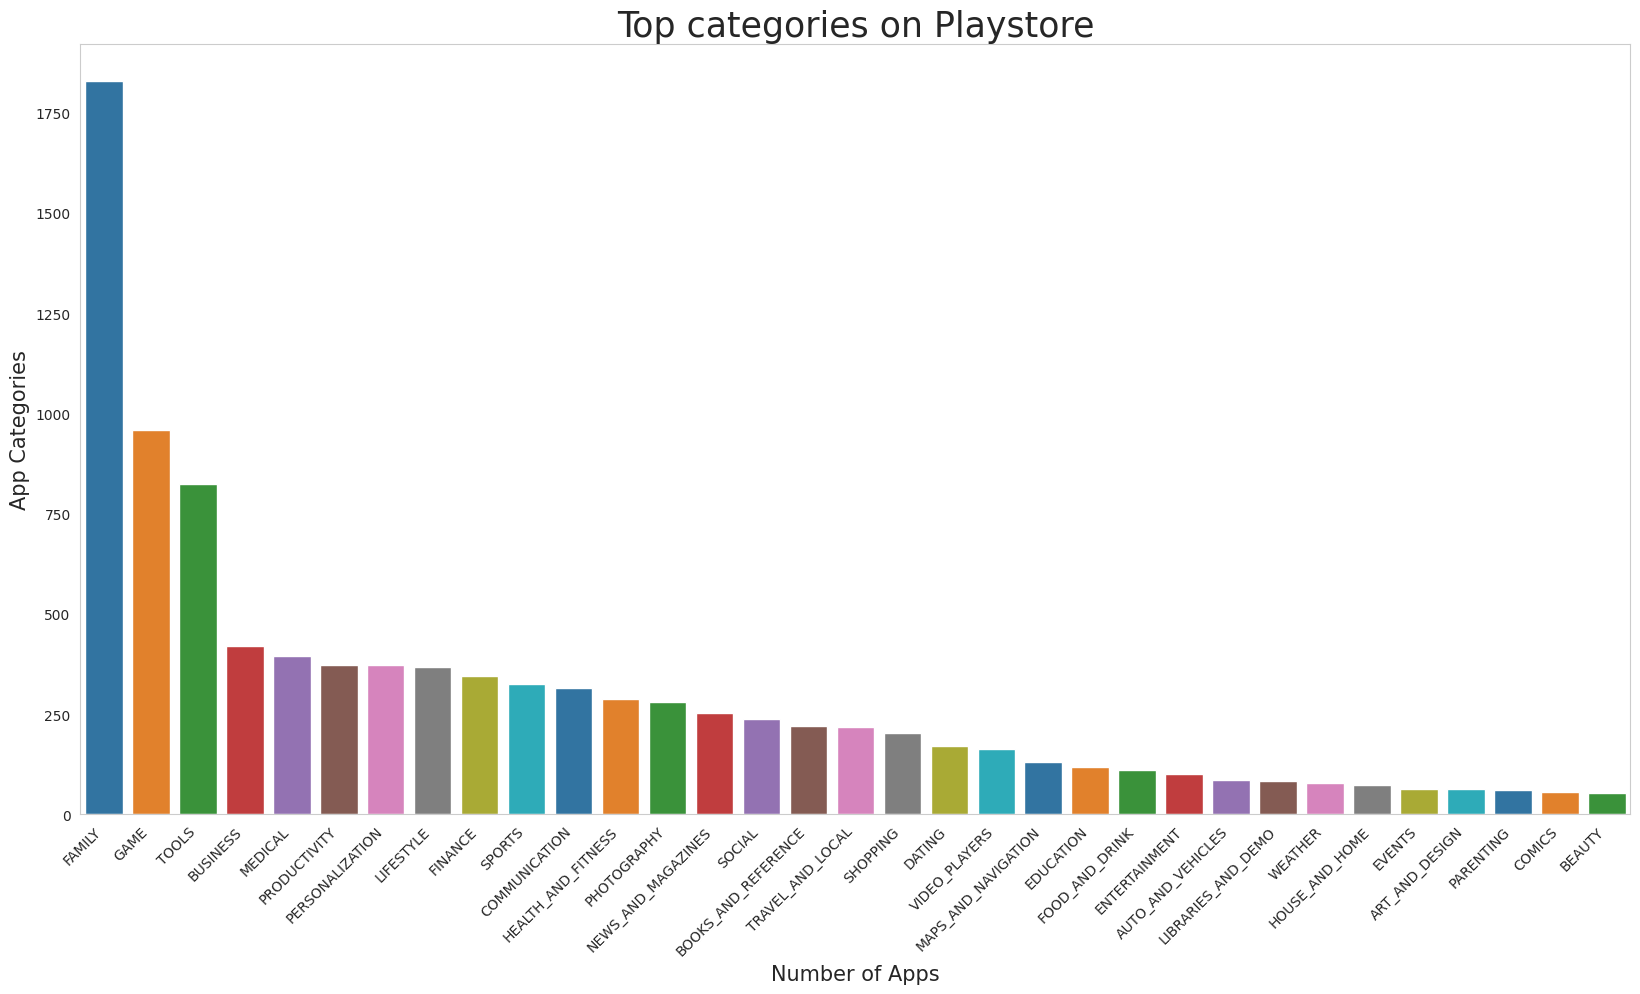

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = y_list, x = x_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

# 3).Which Category have the highest proportion of paid apps?

In [ ]:
# Filter only the paid apps
paid_apps = df[df['Type'] == 'Paid']
# Group by genre and calculate the proportion of paid apps
paid_genre_proportion = paid_apps.groupby('Category')['App'].count() / df.groupby('Category')['App'].count()
paid_genre_proportion = paid_genre_proportion.sort_values(ascending=False)

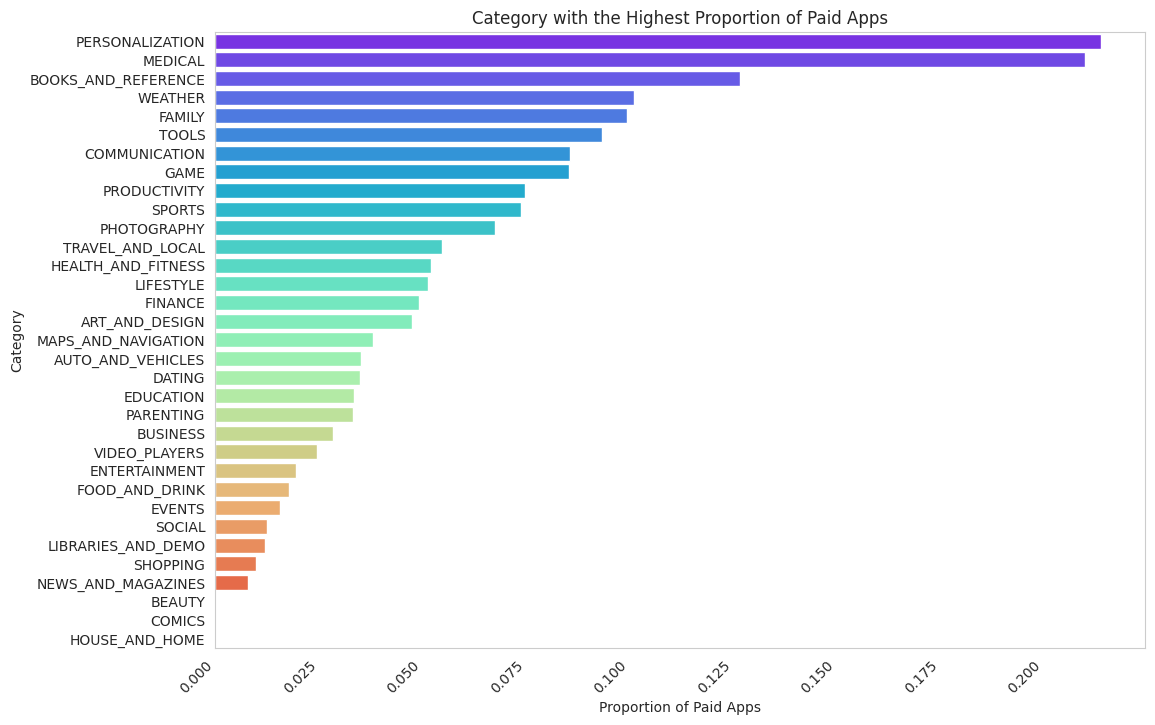

In [ ]:
# Plot the genres with the highest proportion of paid apps
plt.figure(figsize=(12, 8))
sns.barplot(x=paid_genre_proportion.values, y=paid_genre_proportion.index, palette="rainbow")
plt.xlabel('Proportion of Paid Apps')
plt.ylabel('Category')
plt.title('Category with the Highest Proportion of Paid Apps')
plt.xticks(rotation=45, ha='right')
plt.show()

**Findings:**

This tells us the  **Personalization and Medical** categoy has highest proportion of paid apps

# 4).App Category which have more numbers of Installs?

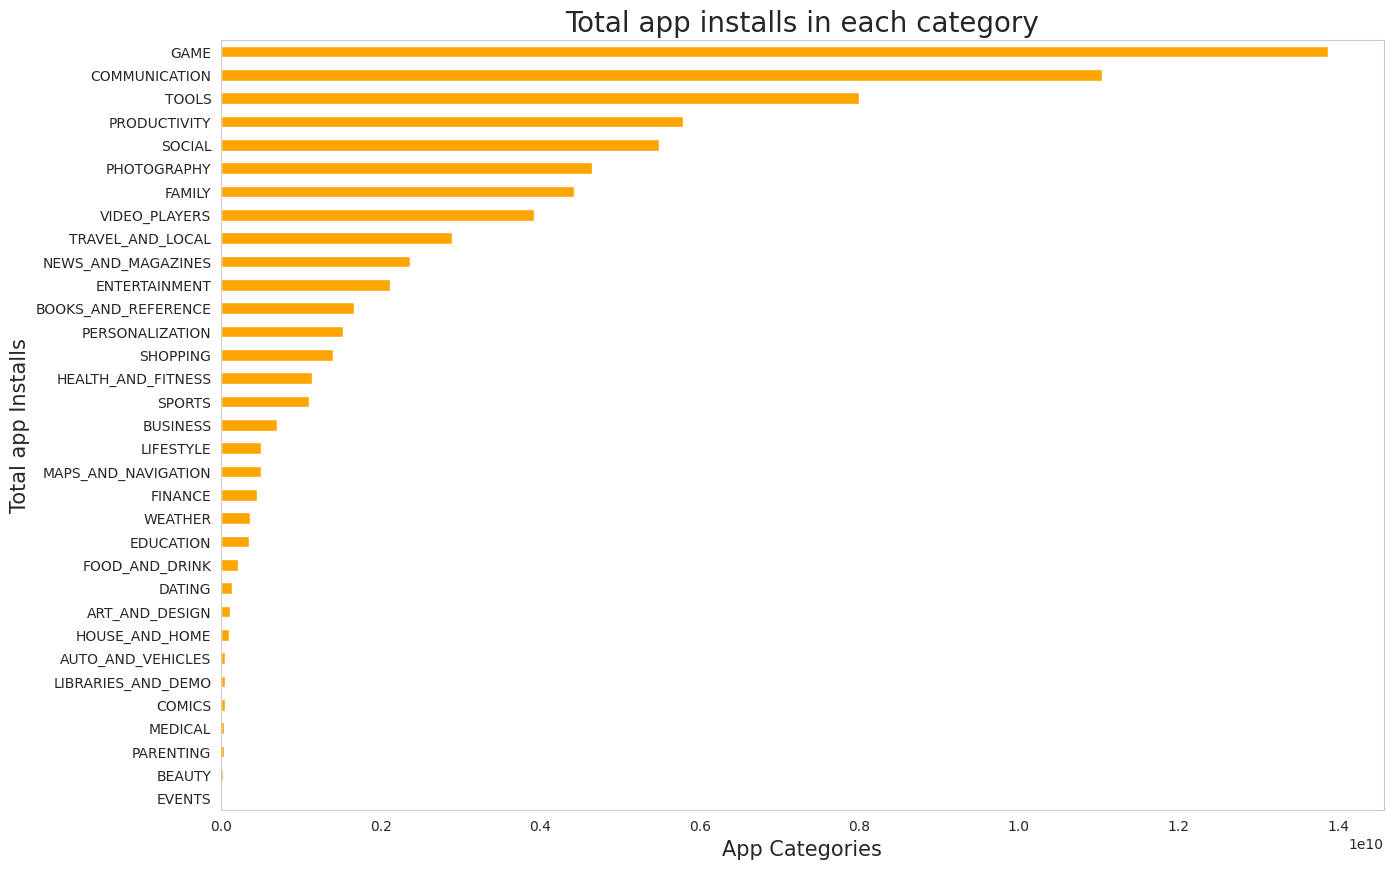

In [ ]:
# total app installs in each category of the play store
a = df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15, 10), color='orange')  # Use orange color
plt.ylabel('Total app Installs', fontsize=15)
plt.xlabel('App Categories', fontsize=15)
plt.xticks()
plt.title('Total app installs in each category', fontsize=20)
plt.show()

**Findings:**

This tells us the category of apps that has the maximum number of installs. The `Game,` `Communication and Tools` categories has the highest number of installs compared to other categories of apps.

# 5).Top 10 most installed app in Game category?

[Text(0, 0, 'Subway Surfers'),
 Text(1, 0, 'Candy Crush Saga'),
 Text(2, 0, 'Temple Run 2'),
 Text(3, 0, 'Pou'),
 Text(4, 0, 'My Talking Tom'),
 Text(5, 0, 'ROBLOX'),
 Text(6, 0, 'Bike Race Free - Top Motorcycle Racing Games'),
 Text(7, 0, 'Talking Tom Gold Run'),
 Text(8, 0, 'Roll the Ball® - slide puzzle'),
 Text(9, 0, 'Vector')]

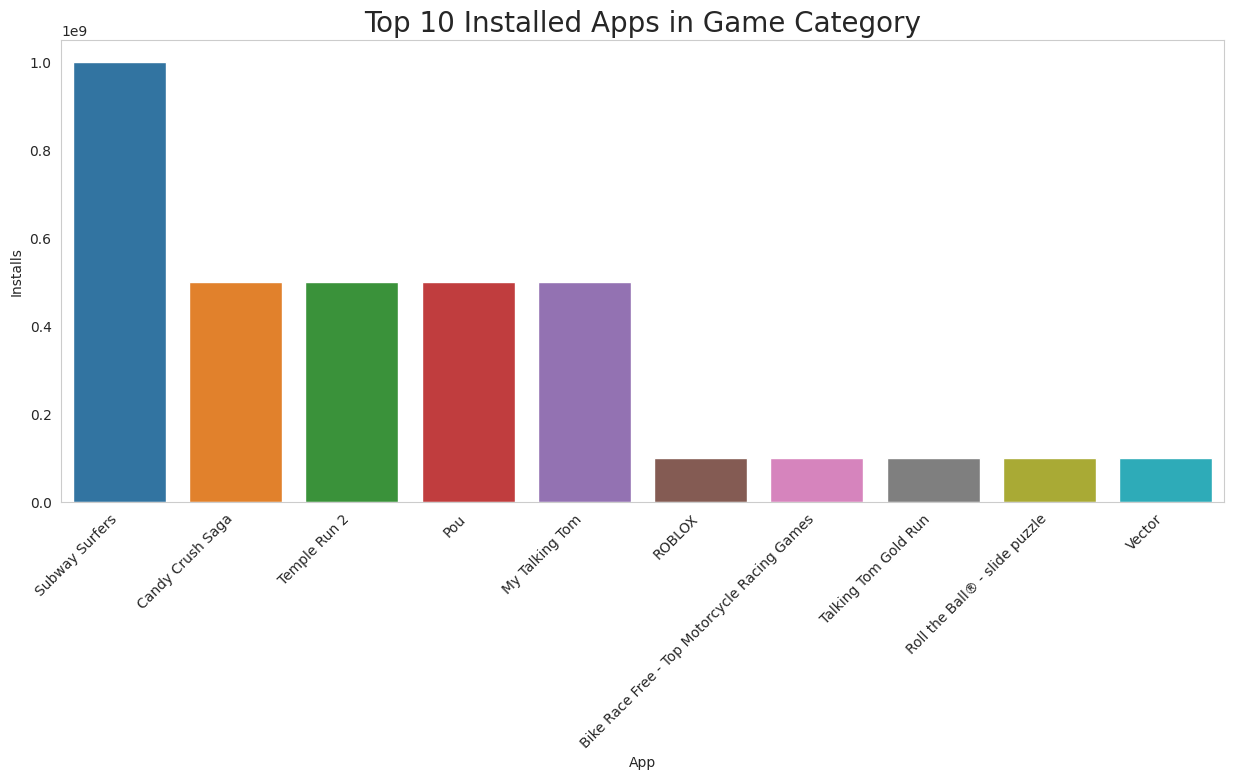

In [ ]:
top10 = df[df['Category'] == 'GAME']
top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
plt.figure(figsize=(15,6), dpi=100)
plt.title('Top 10 Installed Apps in Game Category',size = 20)
graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)#, palette= "icefire")
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

**Findings:**

Subway Surfers is most downloaded game on play store.

# 6). What is the ratio of number of Paid apps and Free apps?

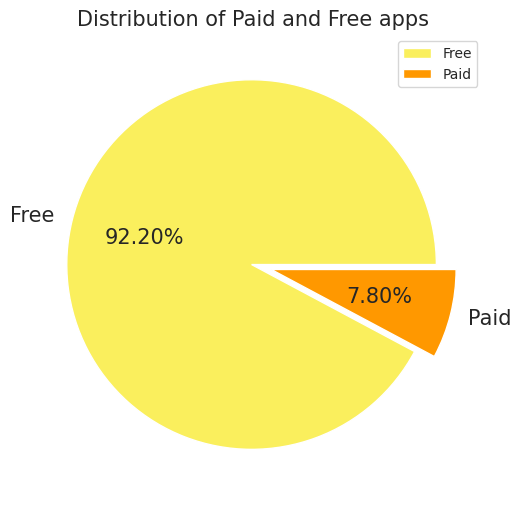

In [ ]:
data = df['Type'].value_counts()
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(6,6))
colors = ["#FAEF5D","#FF9800"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

**Findings:**

It is clearly evident from the above pie chart 92.20% apps are free and 7.80& apps are paid.

# **Sentiment Analysis**

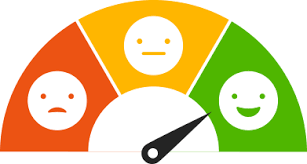

# **Data Visualization on User Reviews:**
### **`7). Percentage of Review Sentiments`**

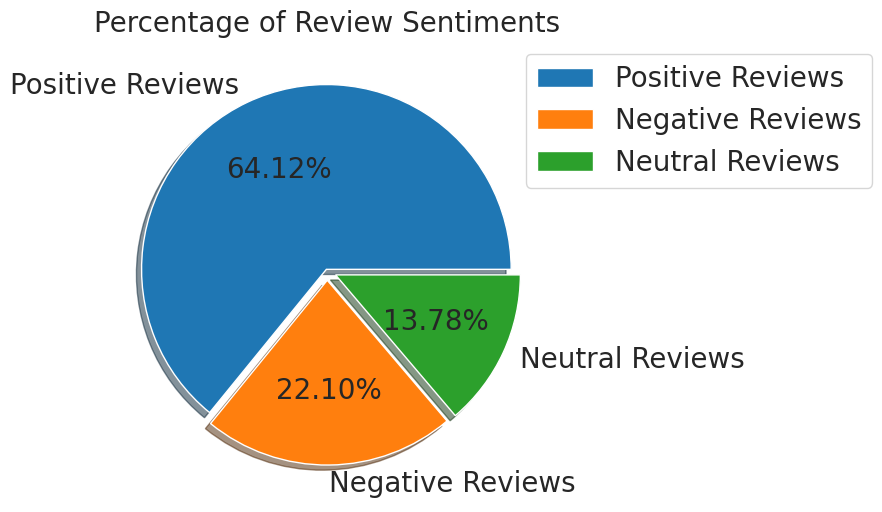

In [ ]:
counts = list(ur_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

**Findings:**

1. Positive reviews are **64.12%**
2. Negative reviews are **22.10%**
3. Neutral reviews are **13.78%**

# 8). Apps with the highest number of positive reviews

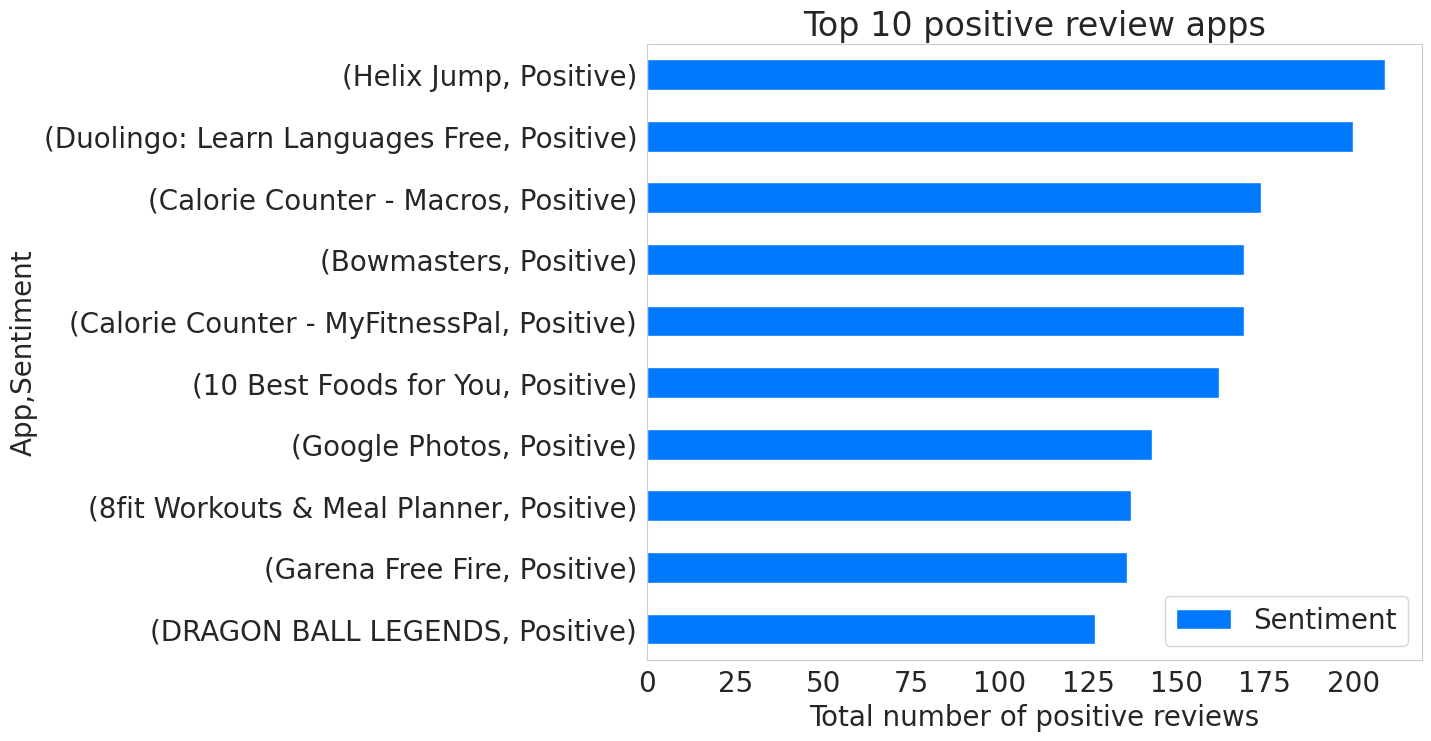

In [ ]:
# positive reviews
positive_ur_df=ur_df[ur_df['Sentiment']=='Positive']
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='#0079FF').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

 **Findings:**

 Helix jump having most positive review

# 9). Apps with the highest number of negative reviews

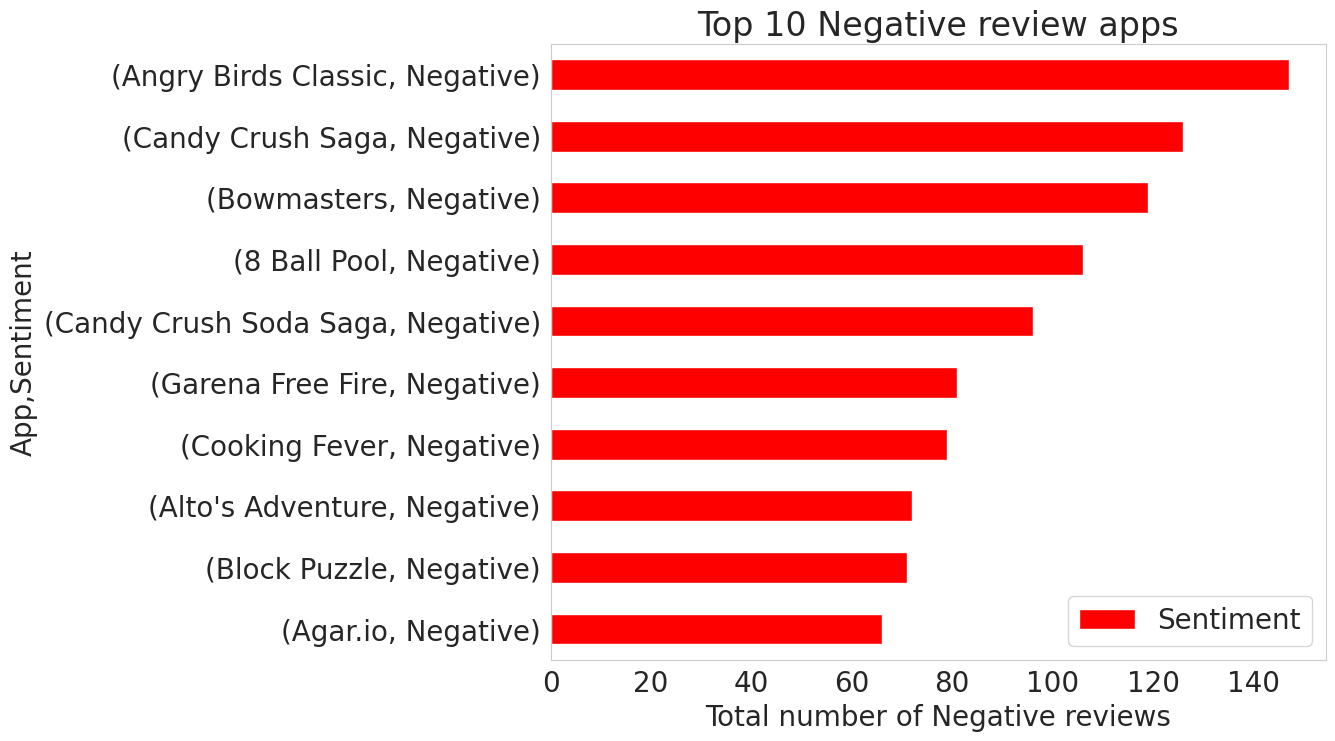

In [ ]:
# Negative reviews
Negative_ur_df=ur_df[ur_df['Sentiment']=='Negative']
Negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='#FE0000').invert_yaxis()
plt.title("Top 10 Negative review apps")
plt.xlabel('Total number of Negative reviews')
plt.legend()

 **Findings:**

Angry Birds classic having most Negative review

#10). Is sentiment_subjectivity proportional to sentiment_polarity?

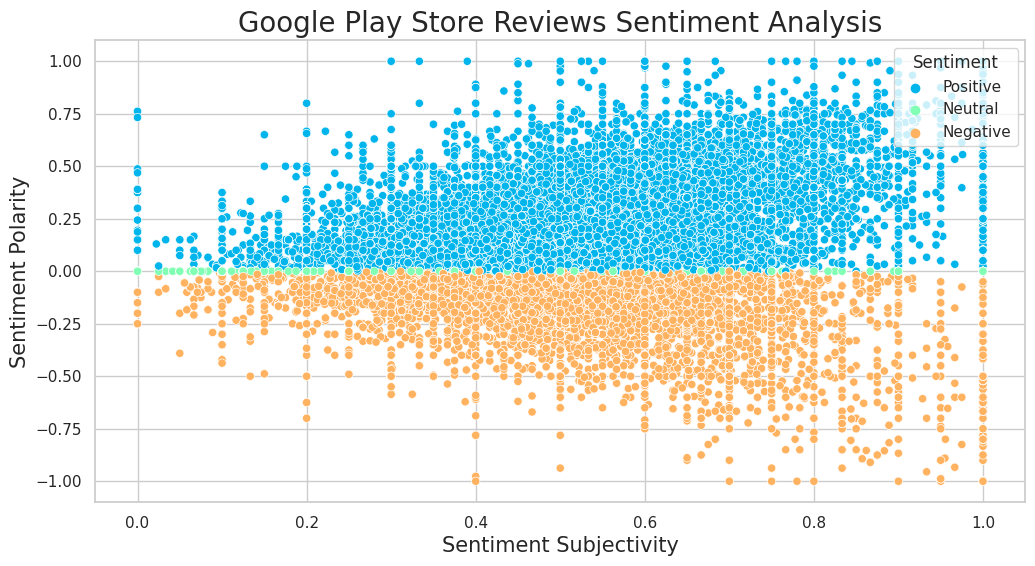

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sentiment_Subjectivity', y='Sentiment_Polarity', hue='Sentiment', edgecolor='white', palette='rainbow', data=ur_df)
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.xlabel("Sentiment Subjectivity", fontsize=15)
plt.ylabel("Sentiment Polarity", fontsize=15)
plt.legend(title='Sentiment', loc='upper right')
plt.show()

 **Findings:**

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

# **📊 Analysis Highlights**

1. **App Focus:**
   - Suggest exploring less-explored categories like Events and Beauty.
   - Since most apps are free, emphasizing the development of free apps is crucial.
   - Targeting the 'Everyone' audience increases the chances of higher installs.

2. **Updates Impact:**
   - Regular app updates positively impact user ratings and installations.

3. **User Sentiments:**
   - User sentiments vary over time, emphasizing the need to focus on evolving user needs and features.

**📈 Key Metrics:**
   - Percentage of free apps: ~92%
   - Percentage of apps with no age restrictions: ~82%
   - Most competitive category: Family
   - Category with the highest average app installs: Game
   - Percentage of top-rated apps: ~80%

**📱 App Categories & Genres:**
   - Top three categories: Family, Game, Tools
   - Top Genres: Tools, Entertainment, Education, Business, Medical
   - 8783 apps have a size less than 50 MB, with a rating above 4.0.

**💻 Technical Insights:**
   - 20 free apps have over a billion installs.
   - Finance is the category with the highest average installation fee for paid apps.
   - The median size of all apps is 12 MB.

**📏 Size & Popularity:**
   - Apps with a size that varies with the device have the highest average installs.
   - Apps with a size greater than 90 MB attract more user reviews, indicating higher popularity.

**🌟 Popular Apps:**
   - 'Helix Jump' has the highest positive reviews.
   - 'Angry Birds Classic' has the highest negative reviews.

**😊 User Sentiments:**
   - Overall sentiment count: Positive (64%), Negative (22%), Neutral (13%).

**🚀 Insights for Success:**
   - Prioritize free apps targeting a broad audience.
   - Focus on consistent updates to enhance user experience.
   - Explore less-explored categories for potential growth.

This analysis offers actionable insights for AlmaBetter to optimize app development and enhance user engagement in the competitive Google Play Store market.


1. **Rating:**
   - Most apps have ratings between 4 and 5, with 4.3 being the most common.
   - Categories generally have an average rating above 4.

2. **Size:**
   - The majority of apps in the dataset are of small size.

3. **Installs:**
   - Top three categories with the most apps are Family, Game, and Tools.
   - Most-installed apps belong to Game, Communication, Productivity, and Social categories.
   - Notable apps with high installations include Subway Surfers, Facebook, Messenger, and Google Drive.

4. **Type (Free/Paid):**
   - About 92% of apps are free, and 8% are paid.
   - The 'Family' category has the highest number of paid apps.
   - Free apps are generally more installed than paid apps.
   - The app "I’m Rich — Trump Edition" in the 'Lifestyle' category is the most expensive, priced at $400.

5. **Content Rating:**
   - Apps with the 'Everyone' content rating have the highest number of installations.
   - Apps with unrated and 'Adults only 18+' ratings have fewer installations.

6. **Reviews:**
   - The number of installs is positively correlated with reviews, with a correlation of 0.64.

7. **Sentiment Analysis:**
   - Most reviews express a positive sentiment, with fewer negative and neutral reviews.

8. **Sentiment Polarity / Sentiment Subjectivity:**
   - Reviews show a wide range of subjectivity, and sentiment polarity falls within [-0.50, 0.75].
   - The majority of reviews exhibit a mid-range of negative and positive sentiments.
   - Sentiment subjectivity is not always proportional to sentiment polarity, but in most cases, it shows a proportional behavior, especially when variance is high or low.
   - Sentiment polarity is not highly correlated with sentiment subjectivity.

This analysis provides a user-friendly overview of the app landscape, user preferences, and sentiment trends in the Google Play Store.

# **🚀 Suggestions for Developers and Stakeholders:**

1. **Diversify App Portfolio:**
   - **Recommendation:** Explore app categories such as Events and Beauty that are currently less explored. It presents an opportunity for differentiation and reaching untapped markets.

2. **Focus on Free Apps:**
   - **Recommendation:** Given that approximately 92% of apps are free, prioritize the development of free apps to align with user preferences and increase potential user acquisition.

3. **Target 'Everyone' Audience:**
   - **Recommendation:** Develop content suitable for all age groups ('Everyone' rating) to maximize installs. This inclusive approach broadens the user base.

4. **Regular App Updates:**
   - **Recommendation:** Consistent updates positively impact user ratings and installations. Encourage regular updates to keep apps relevant and engaging.

5. **Strategic Category Focus:**
   - **Recommendation:** Recognize that the 'Family' category is highly competitive. Consider diversifying efforts into categories with less competition for increased visibility.

6. **Optimize App Sizes:**
   - **Recommendation:** Focus on app sizes below 50 MB, as they tend to attract higher ratings. Optimize app sizes to enhance user experience, especially for users with limited storage.

7. **Leverage Popular Genres:**
   - **Recommendation:** Prioritize genres like Tools, Entertainment, Education, Business, and Medical, as they exhibit high popularity and user engagement.

8. **Monetization Strategy:**
   - **Recommendation:** For paid apps, Finance is a category with potential. Explore effective monetization strategies, considering user preferences and industry trends.

9. **User Engagement Strategies:**
   - **Recommendation:** Implement user engagement strategies based on sentiment analysis. Understand user sentiments and preferences to enhance user satisfaction.

10. **Data-Driven Decision Making:**
   - **Recommendation:** Emphasize the importance of data-driven decision-making. Regularly analyze market trends, user reviews, and app performance to adapt strategies effectively.

11. **Strategic Marketing:**
   - **Recommendation:** Tailor marketing efforts based on the insights gained. Highlight positive reviews and unique features to attract new users.

12. **Continuous Monitoring:**
   - **Recommendation:** Implement continuous monitoring of app performance, user reviews, and market trends. Stay agile and adapt strategies to the dynamic app market.

# **Conclusion:**
The Google Play Store Data Analysis project provides a comprehensive view of the app landscape, offering actionable insights for developers and stakeholders. By understanding user preferences, the impact of updates, and effective monetization strategies, this analysis serves as a valuable resource for optimizing app performance and driving success in the competitive mobile app market.